In [2]:
import math
import time
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize

# Data generation

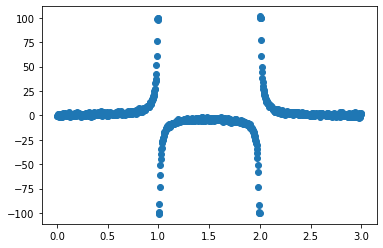

In [7]:
eps = 1e-3
x = np.zeros(1001)
y = np.zeros(1001)
for i in range(len(x)):
    x[i] = 3 * i / 1000.0

def f(x):
    return 1 / (x**2 - 3 * x + 2)

def add_noise(x, y, delta):
    for i in range(len(x)):
        if y[i] < -100:
            y[i] = -100 + delta[i]
        elif y[i] > 100:
            y[i] = 100 + delta[i]
        else:
            y[i] = y[i] + delta[i]

y = f(x)
delta = np.random.normal(0, 1, 1001)
add_noise(x, y, delta)

plt.scatter(x, y)
plt.show()

# Functions definitions

In [4]:
def F(x, *args):
    a, b, c, d = args
    return (a * x + b) / (x**2 + c * x + d)

def D(x, *args):
    x1, y1, F = args
    F1 = lambda y: F(y, x[0], x[1], x[2], x[3])
    res = np.array(list(map(F1, x1)))
    res = (res - y1)**2
    return np.sum(res)

def Dr(x, *args):
    x1, y1, F = args
    return F(x1, x[0], x[1], x[2], x[3]) - y1

# NM method

exec time:  0.5633838176727295
Optimization terminated successfully.
Number of iterations:  454
Number of f evaluations:  769
D value:  135934.4791658359
[-1.00015952  1.00064055 -2.00088407  1.00090012]


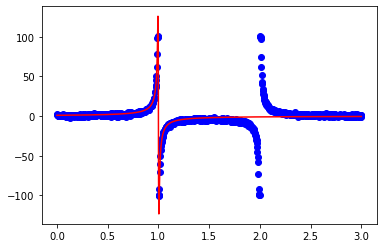

In [30]:
start = time.time()
resNM = scipy.optimize.minimize(D, np.array([1.0, 1.0, 1.0, 1.0]), args=(x, y, F), method='Nelder-Mead', tol=eps)
stop = time.time()
print("exec time: ", stop - start)
print(resNM['message'])
print("Number of iterations: ", resNM['nit'])
print("Number of f evaluations: ", resNM['nfev'])
print("D value: ", D(resNM['x'], x, y, F))
print(resNM['x'])

q, w, e, r = resNM['x'][0], resNM['x'][1], resNM['x'][2], resNM['x'][3]
plt.plot(x, F(x, q, w, e, r), color='red')
plt.scatter(x, y, color='blue')
plt.show()

# LM method

No handles with labels found to put in legend.


`gtol` termination condition is satisfied.
Function evaluations 135, initial cost 1.3404e+05, final cost 6.7970e+04, first-order optimality 1.10e+08.
exec time:  0.003421783447265625
D value:  135934.4791658359
[-1.00085829  1.00131462 -2.00078719  1.00080324]


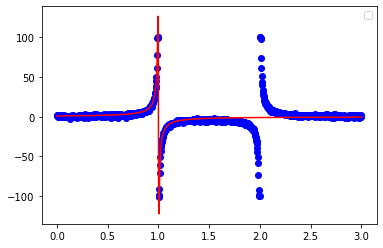

In [31]:
start = time.time()
resLM = scipy.optimize.least_squares(Dr,
                                    np.array([1.0, 1.0, 1.0, 1.0]),
                                    args=(x, y, F),
                                    method='lm',
                                    xtol=1e-15,
                                    gtol=eps,
                                    ftol=1e-15,
                                    verbose=1)
stop = time.time()
print("exec time: ", stop - start)
print("D value: ", D(resNM['x'], x, y, F))
# print("njev", resLM['njev'])
print(resLM['x'])

q, w, e, r = resLM['x'][0], resLM['x'][1], resLM['x'][2], resLM['x'][3]
plt.plot(x, F(x, q, w, e, r), color='red')
plt.scatter(x, y, color='blue')
plt.legend()
plt.show()

# Simulated annealing

No handles with labels found to put in legend.


exec time:  6.599733829498291
['Maximum number of iteration reached']
Number of iterations:  1000
Number of f evaluations:  8931
D value:  136106.11435309696
[-1.00123663  1.00172562 -2.00096775  1.00098401]


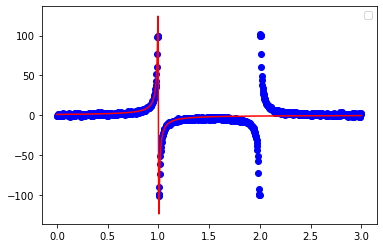

In [8]:
l_min = [-10.0] * 4
l_max = [10.0] * 4
start = time.time()
resSA = scipy.optimize.dual_annealing(D,
                                      bounds=list(zip(l_min, l_max)),
                                      # visit=1,
                                      # accept=1,
                                      args=(x, y, F),
                                      x0=np.array([1.0, 1.0, 1.0, 1.0]))
stop = time.time()
print("exec time: ", stop - start)
q, w, e, r = resSA['x'][0], resSA['x'][1], resSA['x'][2], resSA['x'][3]
print(resSA['message'])
print("Number of iterations: ", resSA['nit'])
print("Number of f evaluations: ", resSA['nfev'])
print("D value: ", resSA['fun'])
print(resSA['x'])
plt.plot(x, F(x, q, w, e, r), color='red')
plt.scatter(x, y, color='blue')
plt.legend()
plt.show()

# Differential evolution

No handles with labels found to put in legend.


Optimization terminated successfully.
exec time:  7.641337156295776
Number of iterations:  166
number of f evaluations:  10120
D value:  136011.6135571356
166
[ 0.99966662 -1.99880013 -3.99897597  3.99796804]


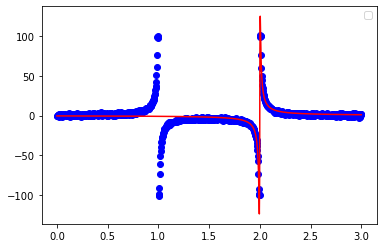

In [11]:
start = time.time()
resDF = scipy.optimize.differential_evolution(D,
                                      bounds=list(zip(l_min, l_max)),
                                      maxiter=1000,
                                      tol = eps,
                                      args=(x, y, F),
                                      x0=np.array([1.0, 1.0, 1.0, 1.0]))
stop = time.time()
print(resDF.message)
print("exec time: ", stop - start)
print("Number of iterations: ", resDF['nit'])
print("number of f evaluations: ", resDF.nfev)
print("D value: ", D(resDF['x'], x, y, F))
print(resDF.nit)
print(resDF['x'])

q, w, e, r = resDF['x'][0], resDF['x'][1], resDF['x'][2], resDF['x'][3]
plt.plot(x, F(x, q, w, e, r), color='red')
plt.scatter(x, y, color='blue')
plt.legend()
plt.show()

# Plot

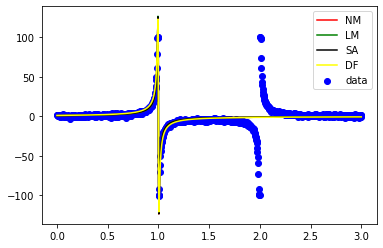

In [44]:
q, w, e, r = resNM['x'][0], resNM['x'][1], resNM['x'][2], resNM['x'][3]
plt.plot(x, F(x, q, w, e, r), color='red', label='NM')
q, w, e, r = resLM['x'][0], resLM['x'][1], resLM['x'][2], resLM['x'][3]
plt.plot(x, F(x, q, w, e, r), color='green', label='LM')
q, w, e, r = resSA['x'][0], resSA['x'][1], resSA['x'][2], resSA['x'][3]
plt.plot(x, F(x, q, w, e, r), color='black', label='SA')
q, w, e, r = resDF['x'][0], resDF['x'][1], resDF['x'][2], resDF['x'][3]
plt.plot(x, F(x, q, w, e, r), color='yellow', label='DF')
plt.scatter(x, y, color='blue', label='data')
plt.legend()
plt.savefig("plot.png", dpi=200, bbox_inches='tight')
plt.show()

